# Wasserstein Eigenvectors on the 1-D torus

This notebook showcases the Wasserstein eigenvectors for synthetic datasets of translated histograms on the 1-D torus, and for various values of the TV regularization parameter $\tau$.

## Imports

In [ ]:
!pip install pot
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ot
import pandas as pd

## Functions to compute distances

In [2]:
# Compute OT distance matrix, with TV regularization
def distance_matrix(A, C, tau=0):
  D = np.zeros((A.shape[1], A.shape[1]))
  for i in range(A.shape[1]):
    if tau == 'inf':
      D[i, :i] = D[:i, i] = abs(A[:,[i]] - A[:,:i]).sum(0)
    else:
      D[i, :i] = D[:i, i] = ot.emd2(np.ascontiguousarray(A[:,i]), A[:,:i], C) + tau*C.max()*abs(A[:,[i]] - A[:,:i]).sum(0)
  return D

In [3]:
# Distance of two bins on the 1-D torus
def torus_distance(i, j, n):
    d1 = abs(j - i)
    d2 = n - d1
    return min(d1, d2)

In [4]:
# Generate random distance-like matrix
def random_distance(n, seed=None):
    np.random.seed(seed)
    D = np.random.rand(n, n)
    D += D.T
    np.fill_diagonal(D, 0)
    return D/D.max()

In [5]:
# Hilbert metric between two matrices
def hilbert(D1, D2):
    idx = (np.eye(D1.shape[0]) != 1) # exclude diagonal
    div = np.log(D1[idx]/D2[idx])
    return div.max() - div.min()

In [6]:
# Power iterations
def power_it(A, D_ref, n_iter=10, compute_loss=True, tau=0):
    D, loss = random_distance(A.shape[0], seed=42), []
    for _ in range(n_iter):
        print(_, end=' ')
        if compute_loss:
            loss.append(hilbert(D, D_ref))
        D = distance_matrix(A, D, tau=tau)
        D /= D.max()
    print('')
    return D, loss

## Example 1: Translated Gaussian

In [7]:
n = 100

In [8]:
# Generate Gaussian
sigma = 10
A_gauss = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        d = torus_distance(i, j, n)
        A_gauss[i, j] = np.exp(-d**2/sigma**2)
A_gauss /= A_gauss.sum(0)

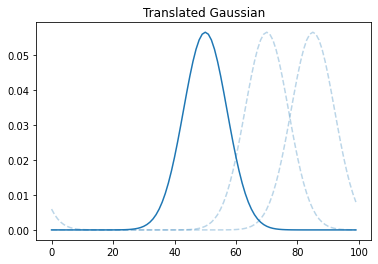

In [9]:
# Plot template
plt.title('Translated Gaussian')
plt.plot(A_gauss[n//2], color='tab:blue')
plt.plot(A_gauss[70*n//100], alpha=.3, linestyle='dashed', color='tab:blue')
plt.plot(A_gauss[85*n//100], alpha=.3, linestyle='dashed', color='tab:blue');

In [ ]:
# Compute eigenvectors for various values of tau
D_gauss = []
for tau in [0, .1, .5, 1, 10, 'inf']:
  print('tau =', tau)
  D_gauss.append(power_it(A_gauss, None, n_iter=50, compute_loss=False, tau=tau)[0][n//2])

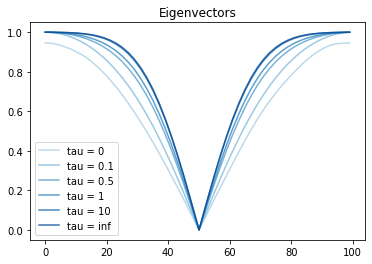

In [24]:
# Plot eigenvectors
plt.title('Eigenvectors')
cmap = matplotlib.cm.get_cmap('Blues')
for k in range(len(D_gauss)):
  plt.plot(D_gauss[k], color=cmap((3 + k)/(3 + len(D_gauss))), alpha=.8)
plt.legend(['tau = ' + str(tau) for tau in [0, .1, .5, 1, 10, 'inf']]);

## Example 2: Translated Gaussian Mixture

In [12]:
n = 100

In [13]:
# Gaussian mixture
sigma = 5
A_mix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        d1 = torus_distance(i, j, n)
        d2 = torus_distance(i, (j + n//3) % n, n)
        A_mix[i, j] += np.exp(-d1**2/sigma**2)
        A_mix[i, j] += .5*np.exp(-2*d2**2/sigma**2)
A_mix /= A_mix.sum(0)

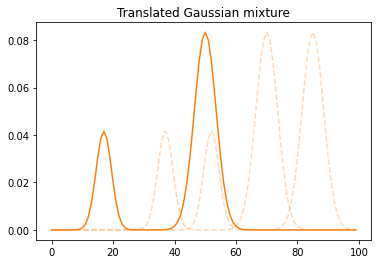

In [14]:
plt.title('Translated Gaussian mixture')
plt.plot(A_mix[n//2], color='tab:orange')
plt.plot(A_mix[70*n//100], alpha=.3, linestyle='dashed', color='tab:orange')
plt.plot(A_mix[85*n//100], alpha=.3, linestyle='dashed', color='tab:orange');

In [ ]:
# Compute eigenvectors for various values of tau
D_mix = []
for tau in [0, .1, .5, 1, 10, 'inf']:
  print('tau =', tau)
  D_mix.append(power_it(A_mix, None, n_iter=50, compute_loss=False, tau=tau)[0][n//2])

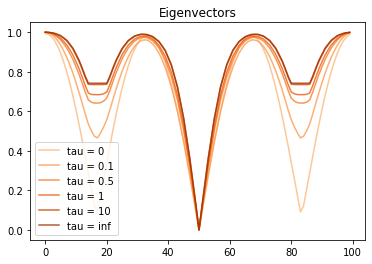

In [23]:
# Plot eigenvectors
plt.title('Eigenvectors')
cmap = matplotlib.cm.get_cmap('Oranges')
for k in range(len(D_mix)):
  plt.plot(D_mix[k], color=cmap((3 + k)/(3 + len(D_mix))), alpha=.8)
plt.legend(['tau = ' + str(tau) for tau in [0, .1, .5, 1, 10, 'inf']]);

## Example 3: Another Gaussian Mixture

In [17]:
n = 100

In [18]:
# Gaussian mixture
sigma = 5
A_mix2 = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        d1 = torus_distance(i, j, n)
        d2 = torus_distance(i, (j + n//2) % n, n)
        A_mix2[i, j] += np.exp(-d1**2/sigma**2)
        A_mix2[i, j] += .5*np.exp(-2*d2**2/sigma**2)
A_mix2 /= A_mix2.sum(0)

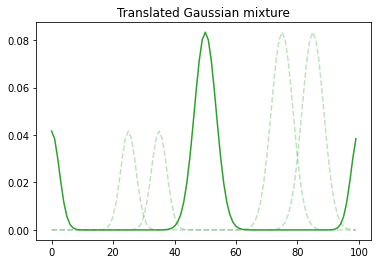

In [19]:
plt.title('Translated Gaussian mixture')
plt.plot(A_mix2[n//2], color='tab:green');
plt.plot(A_mix2[75*n//100], alpha=.3, color='tab:green', linestyle='dashed')
plt.plot(A_mix2[85*n//100], alpha=.3, color='tab:green', linestyle='dashed');

In [ ]:
# Compute eigenvectors for various values of tau
D_mix2 = []
for tau in [0, .1, .5, 1, 10, 'inf']:
  print('tau =', tau)
  D_mix2.append(power_it(A_mix2, None, n_iter=50, compute_loss=False, tau=tau)[0][n//2])

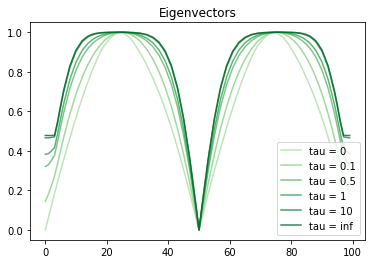

In [22]:
# Plot eigenvectors
plt.title('Eigenvectors')
cmap = matplotlib.cm.get_cmap('Greens')
for k in range(len(D_mix2)):
  plt.plot(D_mix2[k], color=cmap((3 + k)/(3 + len(D_mix2))), alpha=.8)
plt.legend(['tau = ' + str(tau) for tau in [0, .1, .5, 1, 10, 'inf']])